# Stuart's AAAA Dataset
#### Imputed mean for null values
#### Normalized using minmax for null values
#### Transformed skew_transform_log for null values

In [1]:
import Configure_Dataset 
AAAA, y1, y2 = Configure_Dataset.configure('Competition1_raw_data.xlsx')
AAAA.head()

,C1,C2,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C3',C5',C6',one_hot_Manufacturing,one_hot_Other,one_hot_Public Services
0,122.0,1.0,0.029074,51.345,0.640426,0.054250,0.004875,0.009199,0.010929,1,3.864345,11.111111,1,0,0
1,259.0,0.0,-0.013352,25.936,0.644753,0.051395,0.003258,0.011105,0.010876,0,12.028832,0.000000,1,0,0
2,90.0,1.0,0.020715,7.378,0.636816,0.061764,0.011593,0.006271,0.011403,0,3.369134,0.000000,1,0,0
3,209.0,1.0,0.020023,8.526,0.539634,0.061630,0.009686,0.007144,0.013319,0,3.299697,0.000000,1,0,0
4,80.0,1.0,-0.034895,632.298,0.587413,0.048550,0.004518,0.010047,0.011261,1,3.726269,5.000000,0,0,1


In [2]:
AAAA.isnull().sum()

C1                          0
C2                          0
C4                          0
C7                         60
%_long_sentences            0
%_long_words                3
%_positive_words            3
%_negative_words            2
%_uncertain_words           2
C3'                         0
C5'                         0
C6'                         0
one_hot_Manufacturing       0
one_hot_Other               0
one_hot_Public Services     0
dtype: int64

In [3]:
import Impute
AAAA = Impute.impute_mean(AAAA)

In [4]:
AAAA.isnull().sum()

C1                         0
C2                         0
C4                         0
C7                         0
%_long_sentences           0
%_long_words               0
%_positive_words           0
%_negative_words           0
%_uncertain_words          0
C3'                        0
C5'                        0
C6'                        0
one_hot_Manufacturing      0
one_hot_Other              0
one_hot_Public Services    0
dtype: int64

In [5]:
#importnumpy ndarray for use in sklearn
import Normalize

In [6]:
#takes in pandas dataframe and returns a normalized dataset through sklearn's min_max scaler.

AAAA = Normalize.minmax_scale(AAAA)


In [7]:
AAAA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.053924,1.0,0.749962,0.001671,0.775008,0.541683,0.291209,0.313837,0.232749,1.0,0.035990,0.111111,1.0,0.0,0.0
1,0.119884,0.0,0.583748,0.000843,0.780245,0.473428,0.147348,0.398734,0.230548,0.0,0.118042,0.000000,1.0,0.0,0.0
2,0.038517,1.0,0.717213,0.000238,0.770640,0.721351,0.889070,0.183452,0.252440,0.0,0.031013,0.000000,1.0,0.0,0.0
3,0.095811,1.0,0.714502,0.000275,0.653036,0.718150,0.719433,0.222305,0.332049,0.0,0.030315,0.000000,1.0,0.0,0.0
4,0.033702,1.0,0.499347,0.020605,0.710854,0.405407,0.259462,0.351622,0.246559,1.0,0.034602,0.050000,0.0,0.0,1.0


In [8]:
#input a pandas dataframe of competition one dataset and returns a transformed dataset based on values of skewness for each column.
#    For a single column: 
#        if the value of skew is between [-.5, .5], no transformation takes place.
#        if the value of skew is less than -0.5, perform an e^x transformation.
#        if the value of skew is greater than .5, perform a log transformation.
#        '''

import Transform

In [9]:
AAAA = Transform.skew_transform_log(AAAA)

In [10]:
AAAA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.920181,2.718282,0.749962,-6.394336,2.170609,0.541683,-1.233713,-1.158882,-1.457793,1.000000e+00,-3.324522,-2.197225,1.000000e+00,-20.723266,1.000000e-09
1,-2.121227,1.000000,0.583748,-7.078686,2.182007,0.473428,-1.914959,-0.919460,-1.467295,1.000000e-09,-2.136719,-20.723266,1.000000e+00,-20.723266,1.000000e-09
2,-3.256653,2.718282,0.717213,-8.343035,2.161148,0.721351,-0.117579,-1.695801,-1.376582,1.000000e-09,-3.473351,-20.723266,1.000000e+00,-20.723266,1.000000e-09
3,-2.345375,2.718282,0.714502,-8.197055,1.921364,0.718150,-0.329291,-1.503705,-1.102471,1.000000e-09,-3.496110,-20.723266,1.000000e+00,-20.723266,1.000000e-09
4,-3.390185,2.718282,0.499347,-3.882218,2.035730,0.405407,-1.349143,-1.045199,-1.400152,1.000000e+00,-3.363842,-2.995732,1.000000e-09,-20.723266,1.000000e+00


In [11]:
import Combine
AAAAdata = Combine.combine(AAAA, y1, y2)
AAAAdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Y1,Y2
0,-2.920181,2.718282,0.749962,-6.394336,2.170609,0.541683,-1.233713,-1.158882,-1.457793,1.000000e+00,-3.324522,-2.197225,1.000000e+00,-20.723266,1.000000e-09,0,1
1,-2.121227,1.000000,0.583748,-7.078686,2.182007,0.473428,-1.914959,-0.919460,-1.467295,1.000000e-09,-2.136719,-20.723266,1.000000e+00,-20.723266,1.000000e-09,1,0
2,-3.256653,2.718282,0.717213,-8.343035,2.161148,0.721351,-0.117579,-1.695801,-1.376582,1.000000e-09,-3.473351,-20.723266,1.000000e+00,-20.723266,1.000000e-09,1,0
3,-2.345375,2.718282,0.714502,-8.197055,1.921364,0.718150,-0.329291,-1.503705,-1.102471,1.000000e-09,-3.496110,-20.723266,1.000000e+00,-20.723266,1.000000e-09,1,1
4,-3.390185,2.718282,0.499347,-3.882218,2.035730,0.405407,-1.349143,-1.045199,-1.400152,1.000000e+00,-3.363842,-2.995732,1.000000e-09,-20.723266,1.000000e+00,0,1


In [12]:
#export results to csv
import pandas as pd
AAAAdata.to_csv('./Datasets/AAAA.csv')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
correl = AAAAdata.corr()

cmap = sns.diverging_palette(240,10, as_cmap = 'true')
sns.heatmap(correl, xticklabels = correl.columns.values, yticklabels = correl.columns.values, cmap = cmap)
plt.title('coefficient correlation')

Text(0.5, 1.0, 'coefficient correlation')

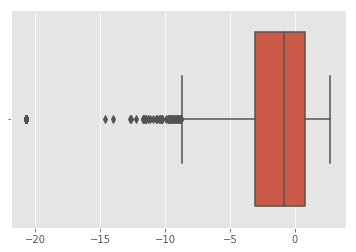

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.boxplot(x=AAAA)

plt.show()

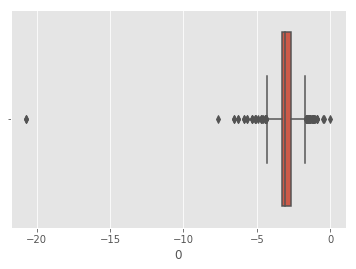

In [15]:
sns.boxplot(x=AAAA[0])

plt.show()

In [16]:
AAAA[0].loc[AAAA[0] < -20]

557   -20.723266
571   -20.723266
Name: 0, dtype: float64